# Preconsolidation pressure / Yield stress

© 2023 Daniel F. Ruiz, Exneyder A. Montoya-Araque y Universidad EAFIT.

This notebook relies on [`pySigmaP`](https://pysigmap.readthedocs.io/en/latest/) developed by [Montoya-Araque et al., (2022)](https://doi.org/10.1016/j.softx.2022.100990).

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/soil_mechanics/blob/main/notebooks/preconsol_pressure.ipynb).


## Required modules and global setup for plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing the required modules...')
    from subprocess import run
    run('pip install ipympl', shell=True);
    run('pip install pysigmap', shell=True);
    from google.colab import output
    output.enable_custom_widget_manager()

from pysigmap.data import Data
from pysigmap.energy import WangAndFrost
from pysigmap.energy import BeckerEtAl
from pysigmap.bilog import Bilog
from pysigmap.boone import Boone
from pysigmap.pachecosilva import PachecoSilva
from pysigmap.casagrande import Casagrande

from ipywidgets import widgets as wgt
from IPython import get_ipython
from IPython.display import display

%matplotlib widget

plt.style.use("default")
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)
html_setup = '<style> div.jupyter-widgets.widget-label {display: none;} </style>'


## Block 1: Input loading data from an external file

In [2]:
url = "https://raw.githubusercontent.com/eamontoyaa/data4testing/main/pysigmap/testData.csv"
data = Data(pd.read_csv(url), sigmaV=75, strainPercent=True)
data.raw


,stress,strain,e
0,0.00,0.000000,0.775190
1,6.18,0.008700,0.759745
2,12.36,0.016000,0.746786
3,24.81,0.025200,0.730455
4,49.52,0.037200,0.709152
5,99.05,0.051000,0.684655
6,198.19,0.066925,0.656385
7,396.38,0.089200,0.616843
8,792.77,0.113400,0.573883
9,1585.43,0.147825,0.512772


/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


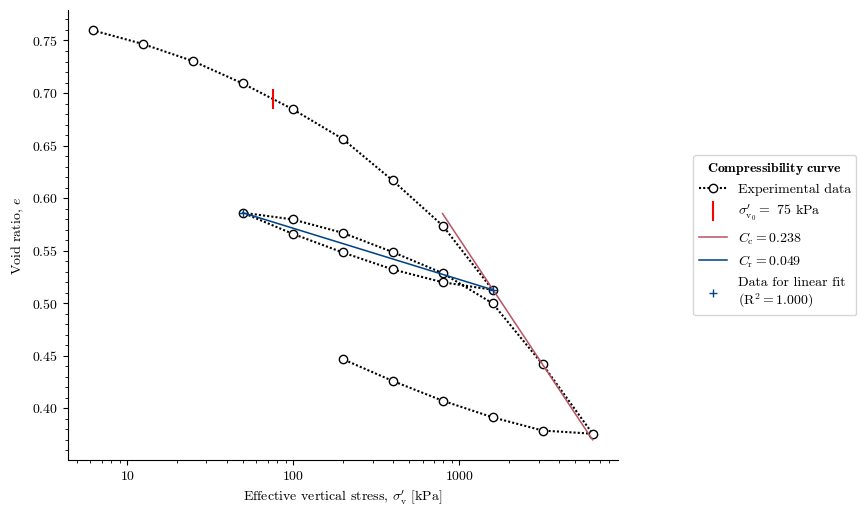

In [3]:
fig = data.plot()
display(fig)


## Block 2: $C_\mathrm{c}$ and $C_\mathrm{r}$ calculated following published criteria

### 2.1 - Default parameters: $C_\mathrm{c}$ (maximum slope) – $C_\mathrm{r}$ (opt=1)

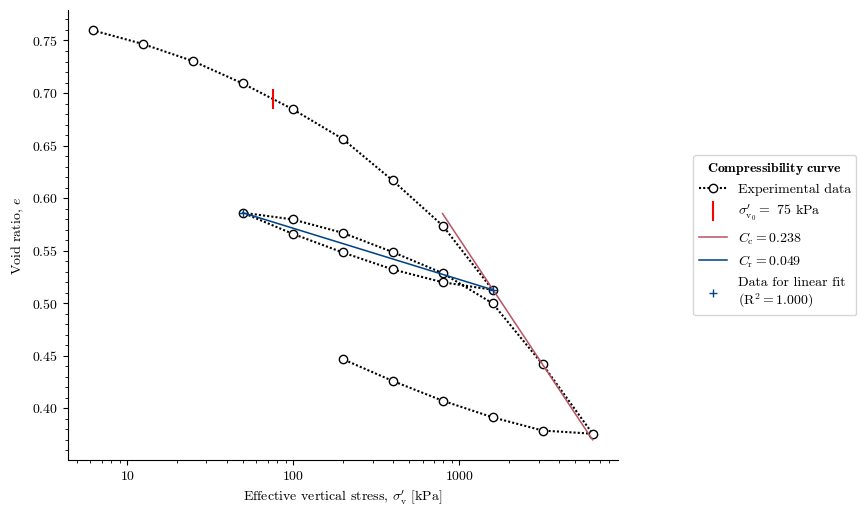

In [4]:
data.compressionIdx(range2fitCc=None)
data.recompressionIdx(opt=1)
fig = data.plot()
display(fig)


### 2.2: $C_\mathrm{c}$ (two last points) – $C_\mathrm{r}$ (opt=2)

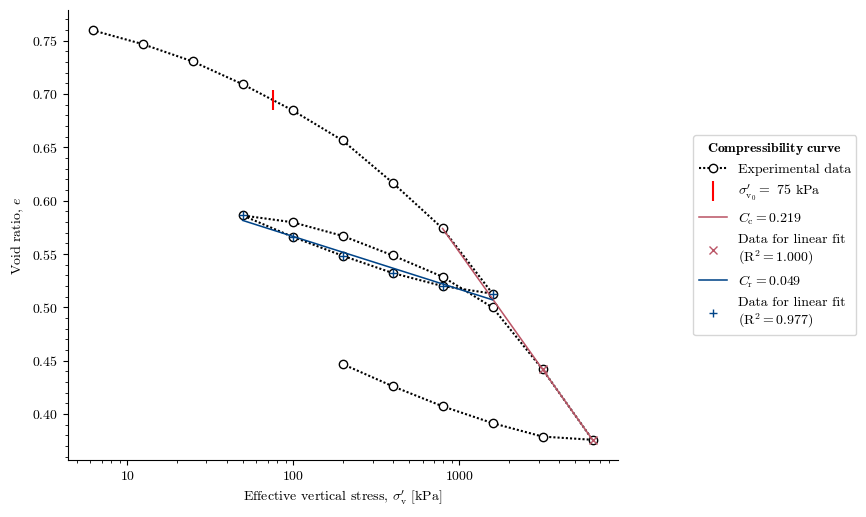

In [5]:
data.compressionIdx(range2fitCc=(3000, 8000))
data.recompressionIdx(opt=2)
fig = data.plot()
display(fig)


### 2.3: $C_\mathrm{c}$ (four last points) – $C_\mathrm{r}$ (opt=3)

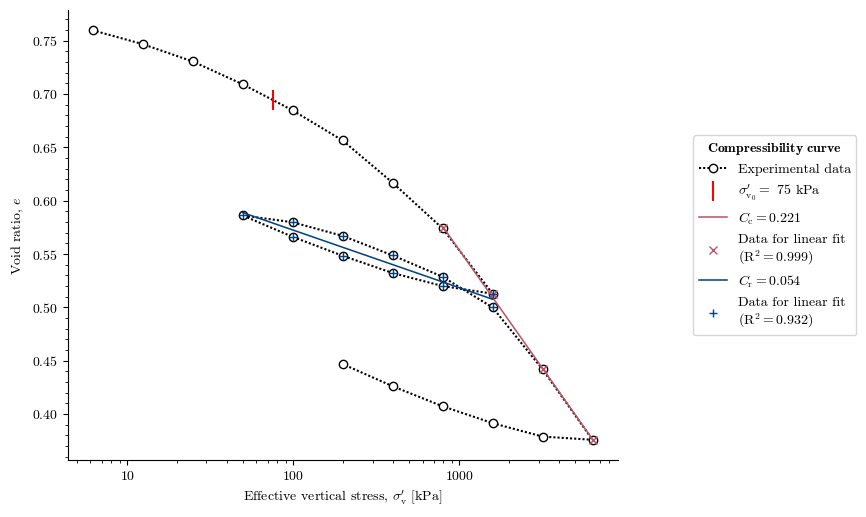

/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/ipympl/backend_nbagg.py:279: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  self.manager.handle_json(content)


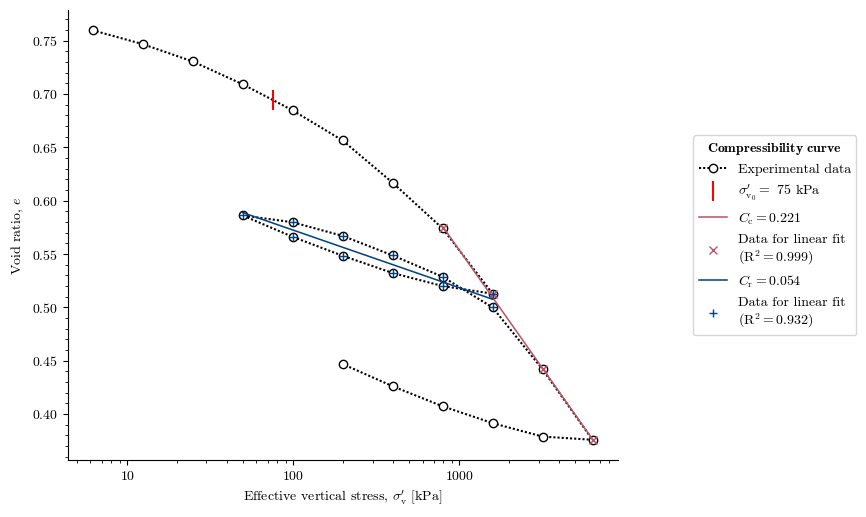

In [6]:
data.compressionIdx(range2fitCc=(700, 8000))
data.recompressionIdx(opt=3)
fig = data.plot()
display(fig)


## Block 3: Computation of $\sigma_{\mathrm{p}}$  via the Casagrande method

In [7]:
m_casagrande = Casagrande(data)


### 3.1: Default parameters: cubic spline function

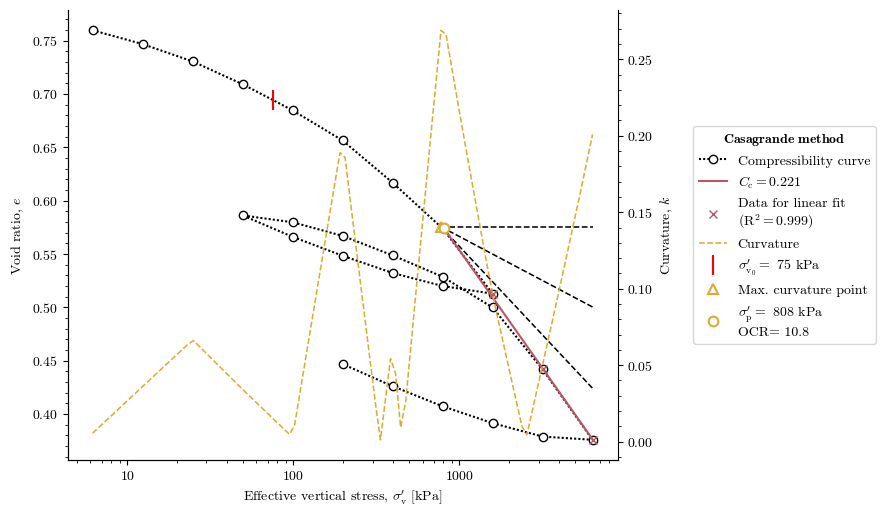

In [8]:
fig = m_casagrande.getSigmaP(mcp=None, range2fitFOP=None, loglog=True)
display(fig)


### 3.2: Fourth order polynomial (FOP)

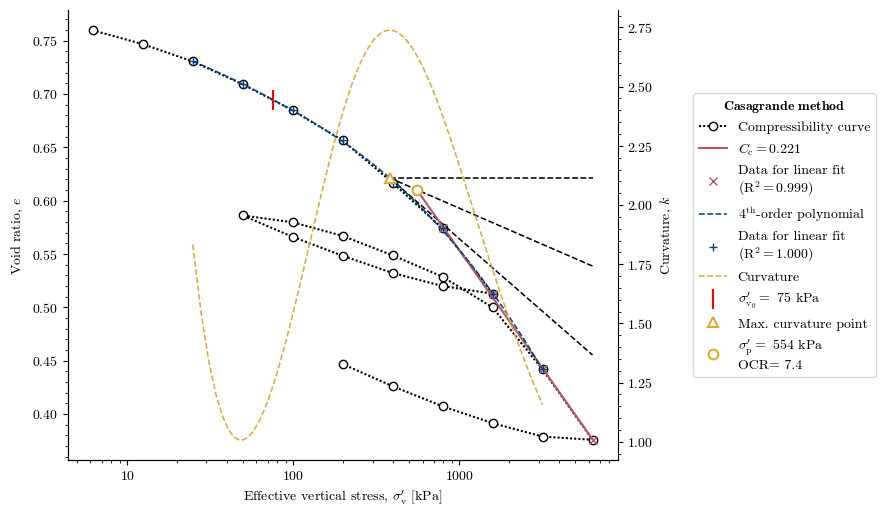

In [9]:
fig = m_casagrande.getSigmaP(range2fitFOP=[20, 5000], loglog=True)
display(fig)


### 3.3: MCP manually introduced

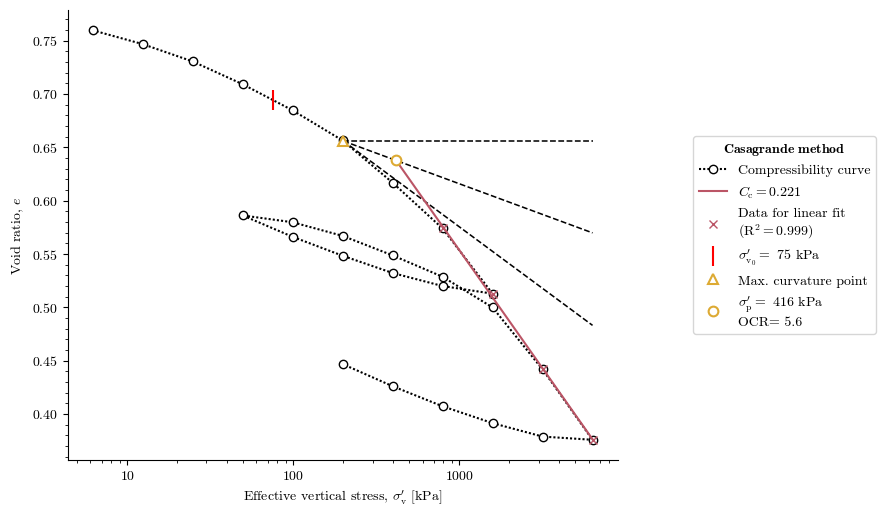

In [10]:
fig = m_casagrande.getSigmaP(mcp=200)
display(fig)


## Block 4: Computation of $\sigma_{\mathrm{p}}$  via the Pacheco Silva and Boone methods

### 4.1: Pacheco Silva method

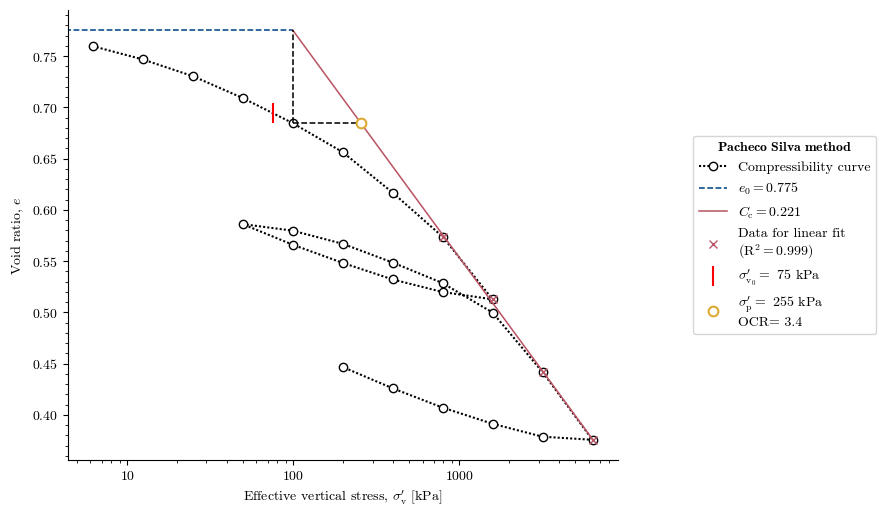

In [11]:
m_pachecosilva = PachecoSilva(data)
fig = m_pachecosilva.getSigmaP()
display(fig)


### 4.2: Boone method

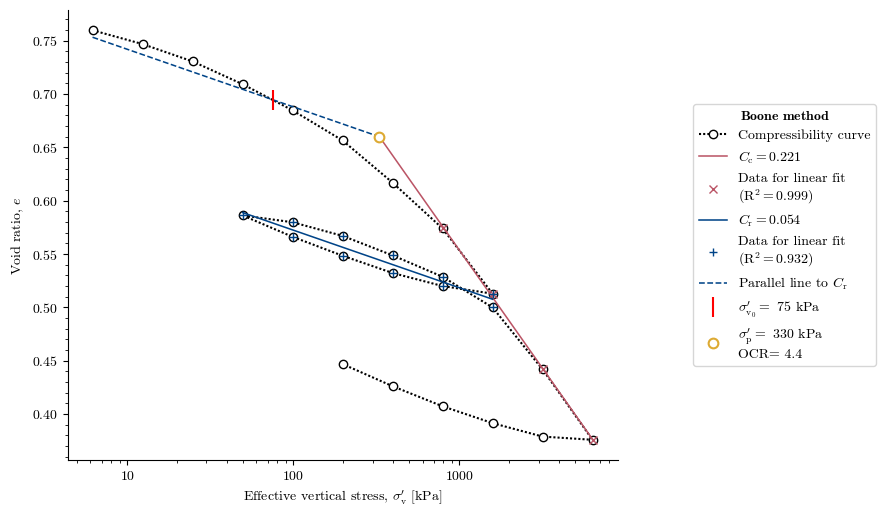

In [12]:
m_boone = Boone(data)
fig = m_boone.getSigmaP()
display(fig)


## Block 5: Computation of $\sigma_{\mathrm{p}}$  via the bilogarithmic methods

In [13]:
m_bilog = Bilog(data)


### 5.1: Butterfield method

/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


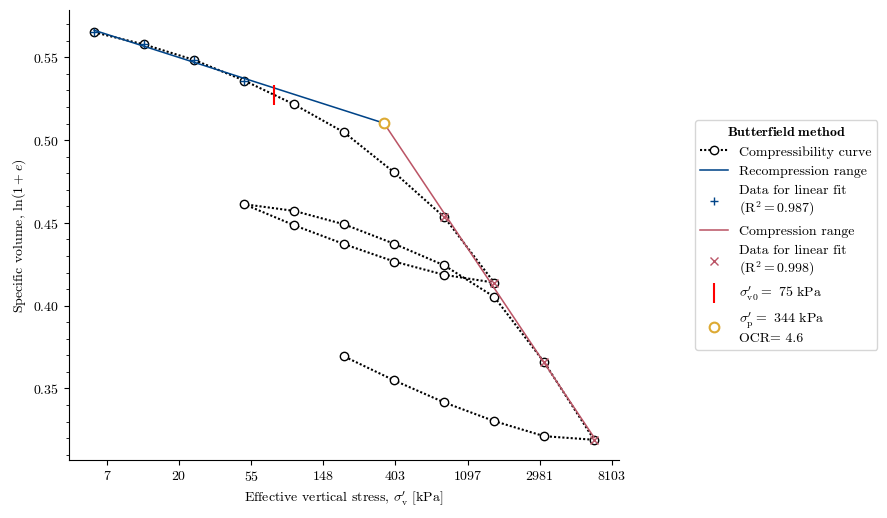

In [14]:
fig = m_bilog.getSigmaP(range2fitRR=None, range2fitCR=None, opt=1)
display(fig)


### 5.2: Oikawa method

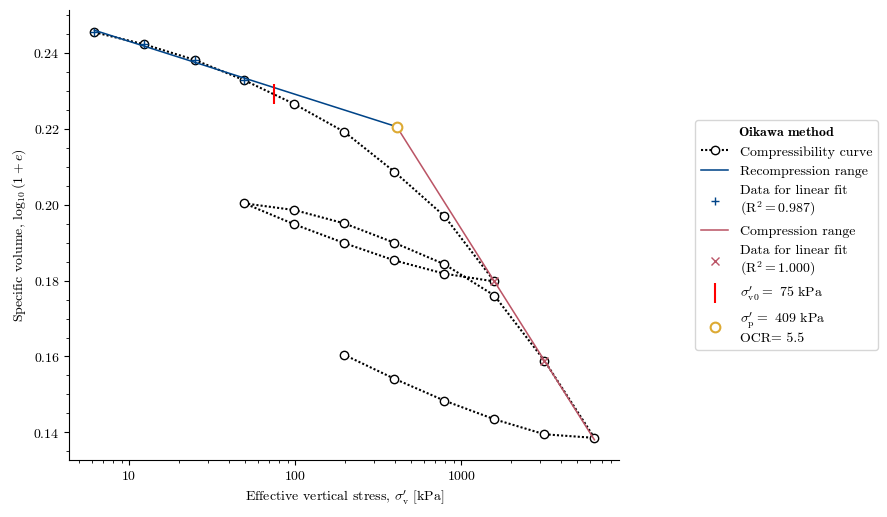

In [21]:
fig = m_bilog.getSigmaP(range2fitRR=None, range2fitCR=[1000, 5000], opt=2)
display(fig)


### 5.3: Onitsuka et al. method

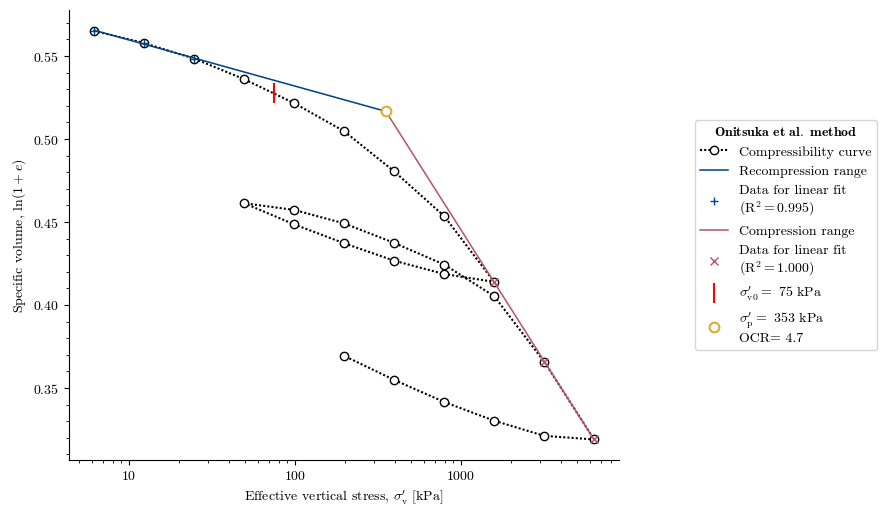

In [16]:
fig = m_bilog.getSigmaP(range2fitRR=[0, 30], range2fitCR=[1000, 9000], opt=3)
display(fig)


## Block 6: Computation of $\sigma_{\mathrm{p}}$ via the strain energy methods

In [17]:
m_becker = BeckerEtAl(data)


### 6.1: Becker et al. method

/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


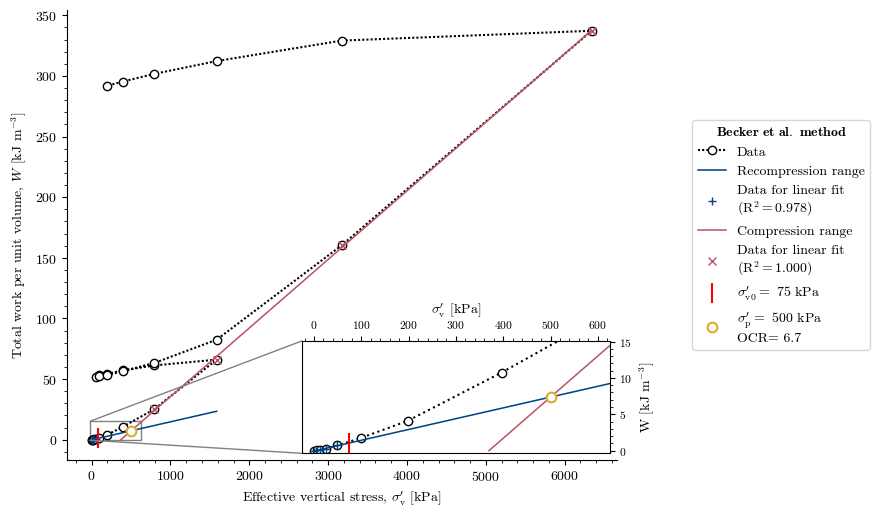

/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/ipympl/backend_nbagg.py:279: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  self.manager.handle_json(content)


In [18]:
fig = m_becker.getSigmaP(range2fitRR=None, range2fitCR=None, morinFormulation=False, zoom=6)
display(fig)


### 6.2: Morin method

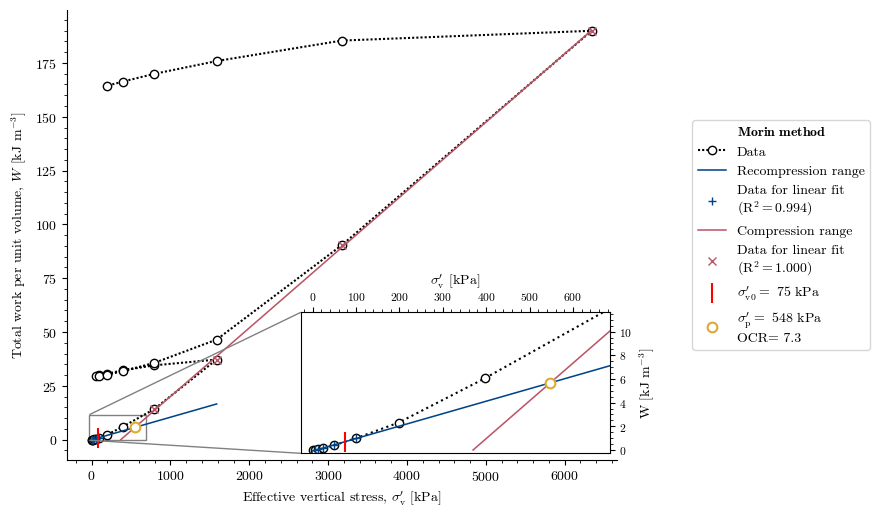

In [22]:
fig = m_becker.getSigmaP(range2fitRR=[0, 100], range2fitCR=[700, 9000], morinFormulation=True, zoom=5.5)
display(fig)


### 6.3: Wang and Frost method

/home/eamontoyaa/.pyenv/versions/3.9.17/envs/EAFIT-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


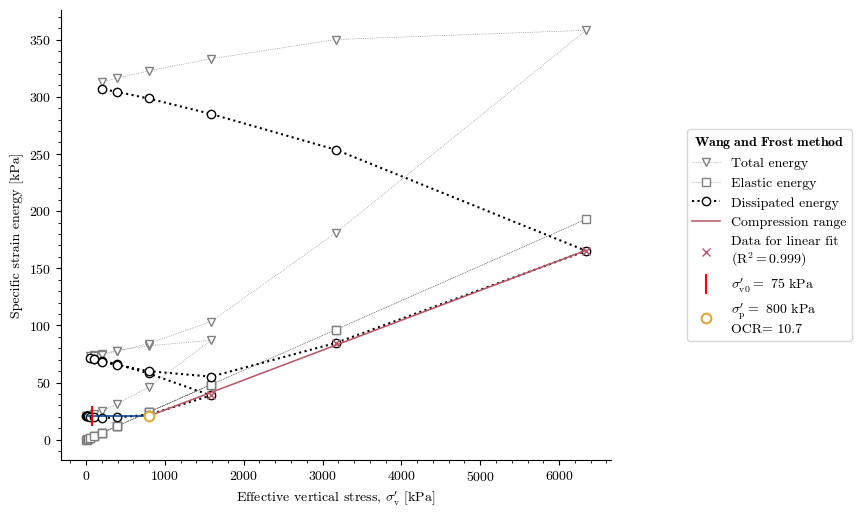

In [20]:
m_wang_n_frost = WangAndFrost(data)
fig = m_wang_n_frost.getSigmaP(range2fitCR=None)
display(fig)
